In [1]:
!pip install sentence_transformers

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/121 [00:00<?, ?it/s]

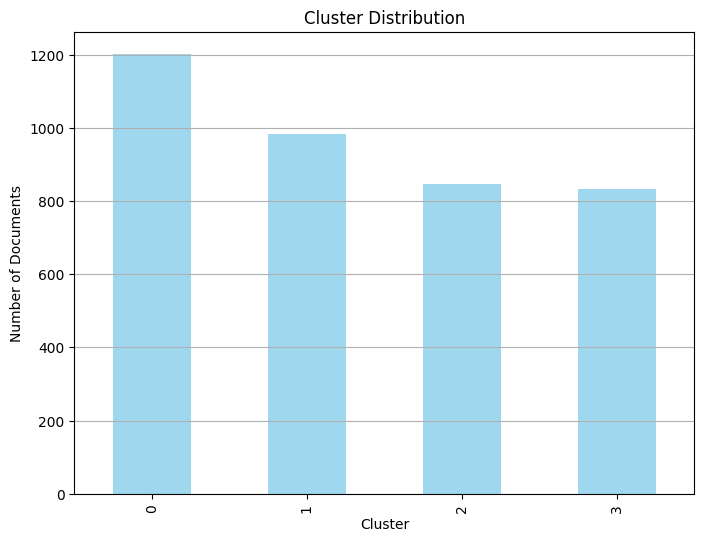

In [3]:
categories = ['rec.sport.baseball', 'sci.space', 'comp.graphics', 'talk.politics.guns']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({'text': newsgroups.data, 'category': newsgroups.target})
df['category_name'] = df['category'].map(lambda x: newsgroups.target_names[x])

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['text'], show_progress_bar=True)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(embeddings)

df['cluster'] = labels

plt.figure(figsize=(8, 6))
df['cluster'].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.grid(axis='y')
plt.show()

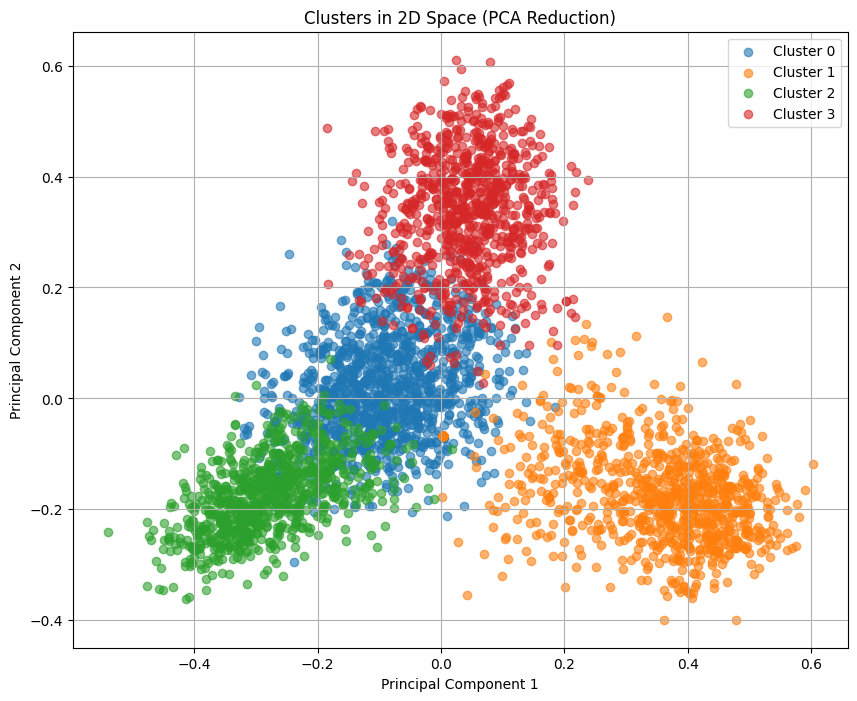

Silhouette Score: 0.0631069466471672


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
for cluster in range(4):
    cluster_points = reduced_embeddings[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title('Clusters in 2D Space (PCA Reduction)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

silhouette_avg = silhouette_score(embeddings, labels)
print(f"Silhouette Score: {silhouette_avg}")